## K-Means Clustering with sklearn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib notebook

In [21]:
from sklearn.datasets import make_blobs

raw_data = make_blobs(n_samples = 1000, n_features = 2, centers = 20, cluster_std = 0.9)
# plt.scatter(raw_data[0][:,0], raw_data[0][:,1], c=raw_data[1])


In [26]:
from sklearn.cluster import KMeans
start = time.time()

mnc = 20 #max number of clusters
err = np.zeros([mnc,1])

for i in range(mnc):
    km = KMeans(n_clusters= i + 1)
    km.fit(raw_data[0])
    err[i] = km.inertia_

# print("\n estiamted cluster centers: \n", km.cluster_centers_)
# print(km.__doc__)

print("took", time.time()-start, "seconds")
plt.plot(err)

took 0.7951793670654297 seconds


<IPython.core.display.Javascript object>


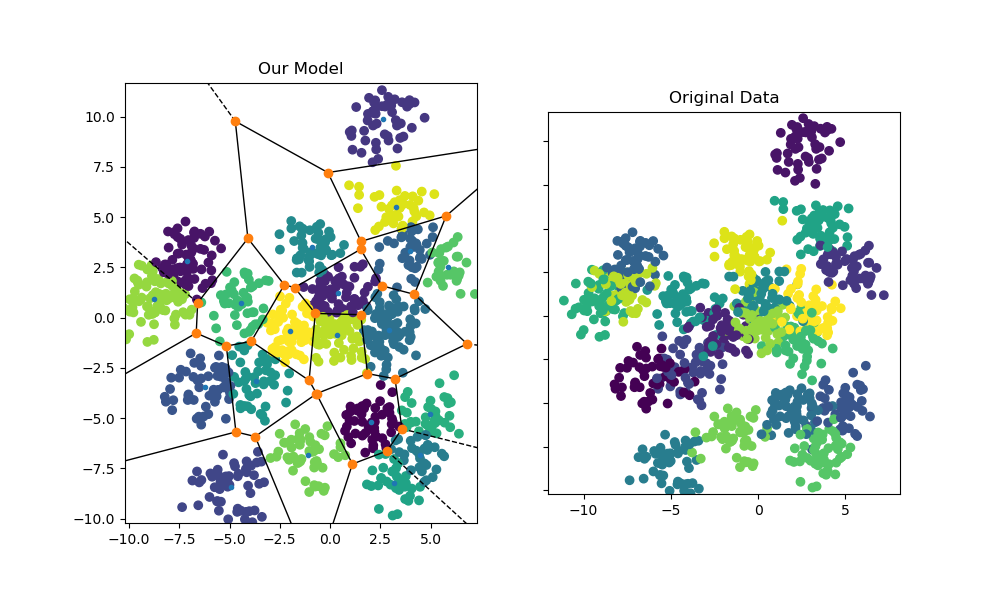

In [27]:
# import scipy
from scipy.spatial import Voronoi, voronoi_plot_2d

V = Voronoi(points = km.cluster_centers_)
# fig = voronoi_plot_2d(V)
# ax.set_aspect('equal')

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))

ax1.set_title('Our Model')
fig = voronoi_plot_2d(V, ax1)
ax1.scatter(raw_data[0][:,0], raw_data[0][:,1],c=km.labels_)
ax1.set_aspect('equal')

ax2.set_title('Original Data')
ax2.scatter(raw_data[0][:,0], raw_data[0][:,1],c=raw_data[1])
ax2.set_aspect('equal')

<IPython.core.display.Javascript object>


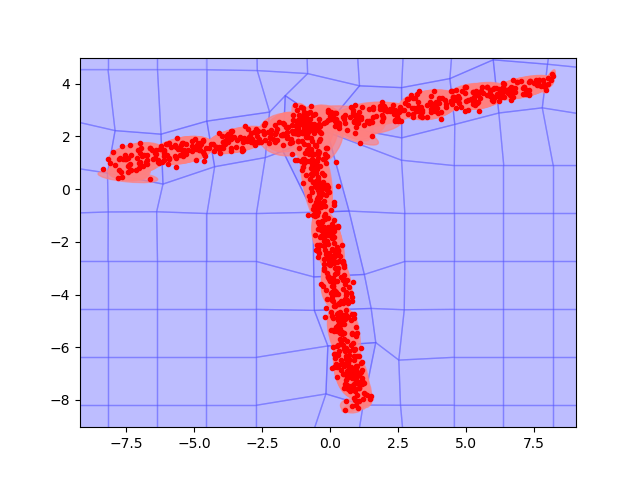

In [30]:
from divide import divide

fig3 = plt.figure()
ax3 = fig3.add_subplot()

D = divide(fig3, ax3, n = 5)

#see how voronoi diagrams produce similar results to grandient descenet on voxel edges

<IPython.core.display.Javascript object>


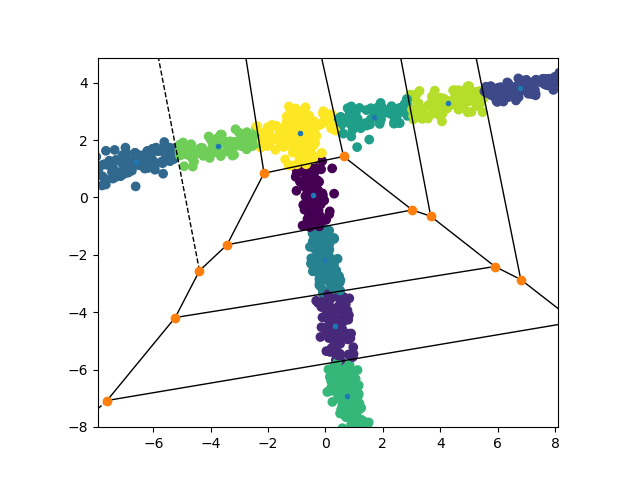

In [32]:
km = KMeans(n_clusters = 10)
km.fit(D.cloud)

fig4 = plt.figure()
ax4 = fig4.add_subplot()

V = Voronoi(points = km.cluster_centers_)

fig4 = voronoi_plot_2d(V, ax4)
ax4.scatter(D.cloud[:,0], D.cloud[:,1],c=km.labels_)
ax4.set_aspect('equal')


In [ ]:
#TODO: check this out
# https://freud.readthedocs.io/en/v1.2.0/examples/examples/Visualizing%203D%20Voronoi%20and%20Voxelization.html